In [55]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np
from scipy.special import gamma
from scipy import signal
import time
import itertools
from itertools import combinations
try:
    from tqdm import tqdm_notebooks as tqdm
except ImportError:
    tqdm = lambda x: x
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
###
from collections import defaultdict

from scipy.stats import pearsonr, zscore
# from MFDFA import fgn
# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set()
from tqdm import tqdm
# from shogun.Evaluation import RealFeatures, BinaryLabels, LibSVM, AccuracyMeasure, ROCEvaluation
import matplotlib as mpl
from matplotlib import cm

import sys
sys.path.insert(0, '/directory/tothe/handshakefile/')

from shogun import *
from scipy.stats import norm, laplace
import random
import hypothesisTesting.shogunMMDutils as mmdutils

# import stylised_facts_data_utilities.createLOB as createLOB
import stylised_facts_data_utilities.gpyNARX as gpyNARX
import stylised_facts_data_utilities.longtaildistr as longtail
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle.mplstyle'))

In [56]:
from pycopula.copula import ArchimedeanCopula
from pycopula.visualization import concentrationFunction
from pycopula.simulation import simulate
from matplotlib import cm
from pycopula.copula import *
from mpl_toolkits.mplot3d import Axes3D

In [57]:
# import numerical libraries

from scipy import stats
# import tableone
try:
    from tableone import TableOne
except (ModuleNotFoundError, ImportError):
    # install on Colab
    !pip install tableone
    from tableone import TableOne

### Assumptions and Investigations

### 1/ By moving to the tick domain, the need to force each trade into a time slot is removed as one does
### not need to force the trades into predetermined sampling points as in calendar time. Additionally, when using ###calendar time sampling

### 2/ can we recover normality in each of the assets and periods?

### 3/duration between trades is
### also added to the subordination framework to account for
### the speed with which market participants act in physical time.

### 4/we bring qualitative empirical evidence that the impact of a single
### trade depends on the intertrade time lags. We find that when the trading rate be- comes faster, the return ### variance per trade strongly increases and that this behavior persists at coarser time scales. 

### 5/So we answer the following question: is the realized variance created by 10 trades arriving over 10 seconds similar to the realized variance created by those very same trades had they arrived during 10 minutes? Any model that uses a transaction time clock implies that the two situations are similar. Our empirical findings show that they are not, and that trades arriving in a shorter duration have higher variance, thus showing the importance of the physical inter-trade time duration. 

In [58]:
ActivityCLockData= '/media/ak/Data1/ExperimentData/ActivityClockData/'

OHLCData= '/media/ak/Data1/ExperimentData/OHLCData/'
folderList = os.listdir(ActivityCLockData)
OHLCDataList = os.listdir(OHLCData)
ActivityClockDataList = os.listdir(ActivityCLockData)

symbols =['FB1','JB1','FV1','G_1','DU1']


### very hacky data structures to keep track of stuff.

In [59]:
JB1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and ('JB1') in s])
FV1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and ('FV1') in s])
G1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and ('G_1') in s])

## take dataframes of all the files. so this is just filename.pkl in here

In [60]:
DU1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and ('DU1') in s])
FB1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and ('FB1') in s])
AllClocksData = [DU1ClocksData, FB1ClocksData, JB1ClocksData, FV1ClocksData, G1ClocksData  ]

In [61]:
pklidx = 0
pklClockFile = "".join((ActivityCLockData,DU1ClocksData[pklidx]))
pickleBarDF = pickle.load(open(pklClockFile , "rb"))

In [62]:

types_of_bars = ['OriginalDF', 'TickBarDf', 'VolumeBarDf', 'DollarVolumeBarDf']
range_list = [x for x in range(0,10)]#list(range(0, 25))


In [63]:
# next create all the file locations
pklClockFile_locations = ["".join((ActivityCLockData,clocksDataList[pklIdx])) for clocksDataList in AllClocksData for pklIdx in range(0,25)]

### now lets get all the dataframes out

In [64]:
tickBar_dfs = [pickle.load(open(pklClockFile , "rb"))['TickBarDf'] for pklClockFile in pklClockFile_locations]

In [65]:
dataFrames = [pickle.load(open(pklClockFile , "rb"))[frame] for pklClockFile in pklClockFile_locations for frame in types_of_bars ]

## 1 - read from AllClocksData
## 2 - read from pklidx
## 3 - get pklClockFile
## 4 - load picklefile, and extract the dataframe
## 5  - take the 

## pick DU1 First ## 

In [66]:
raw_data=dataFrames[1]#.values[:,1:]
raw_data.columns.values

array(['BidQuoteId', 'BidSize', 'QuoteTime', 'type_x', 'BestBid',
       'TradeTime', 'AskQuoteId', 'AskSize', 'time_y', 'type_y',
       'BestAsk', 'TradeId', 'TradeVolume', 'TradedTime', 'type',
       'TradePrice', 'TradeId', 'TimeStamp', 'milliSeconds',
       'DollarVolume', 'MicroPrice', 'TradeSize', 'DollarVolumeTraded'],
      dtype=object)

In [67]:
data= pd.DataFrame()
data['Returns'] = raw_data['MicroPrice'].pct_change()
data['TradedVolume'] = raw_data['TradeVolume']
data['InterTradeDuration'] = raw_data.milliSeconds.diff()

In [47]:
data = data.dropna()


In [40]:

archimedean = ArchimedeanCopula(family="gumbel", dim =3 )

In [41]:
gumbel = archimedean.fit(data, method ="cmle")

 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/pycopula-0.1.5-py3.6.egg/pycopula/archimedean_generators.py:38: RuntimeWarning:invalid value encountered in power


In [42]:
# clayton = ArchimedeanCopula(dim =2 , family='clayton')
simulate(archimedean, 100)

[[0.4362094733809889, 0.4811517299039998, 0.18792846447684086],
 [0.045934655671958716, 0.4517745820696693, 0.3065405454037222],
 [0.4389216276421111, 0.5698342886379215, 0.5567850124035965],
 [0.0637737333414332, 0.46225570716087755, 0.16197505272033882],
 [0.7301767787346268, 0.7626472696163108, 0.6949389080084081],
 [0.04529630077501269, 0.12218451152586524, 0.031085767645341603],
 [0.4879109320414778, 0.9253889124701826, 0.8424123785300699],
 [0.8039206834416459, 0.903072398666123, 0.9037791252488747],
 [0.2032457598130796, 0.07573121643944404, 0.1826915003584573],
 [0.03758632118961812, 0.22025558584675672, 0.31182603379577956],
 [0.8003534051023656, 0.148745131330415, 0.16116755313783585],
 [0.09939993658301785, 0.8409977398221469, 0.03383309678241813],
 [0.24830278640744072, 0.0739423709903731, 0.5456935474423898],
 [0.04823125576031531, 0.14898191586022544, 0.06180957137737554],
 [0.8271620997034019, 0.9493428779079657, 0.8889578596557279],
 [0.21063711420307715, 0.799979418090

In [44]:
from pycopula.visualization import pdf_2d, cdf_2d
from copulas.visualization import scatter_3d

<Axes3DSubplot:>

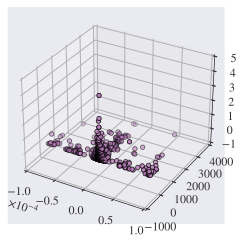

In [48]:
scatter_3d(data)

In [49]:
from copulas.multivariate import GaussianMultivariate

dist = GaussianMultivariate()
dist.fit(data)

 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning:The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4965: RuntimeWarning:divide by zero encountered in true_divide
 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning:invalid value encountered in double_scalars
 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4956: RuntimeWarning:divide by zero encountered in power
 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning:invalid value encountered in sqrt


In [51]:

sampled = dist.sample(data.shape[0])

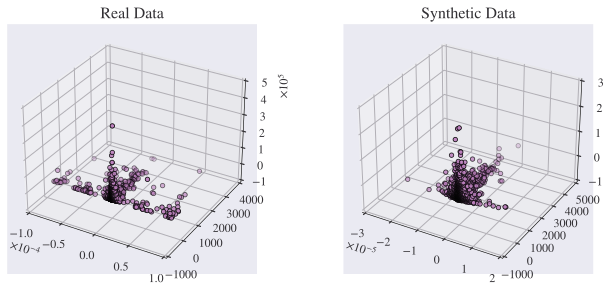

In [52]:
from copulas.visualization import compare_3d

compare_3d(data, sampled)

In [53]:
from copulas.multivariate import VineCopula

center = VineCopula('center')
regular = VineCopula('regular')
direct = VineCopula('direct')

center.fit(data)
regular.fit(data)
direct.fit(data)

center_samples = center.sample(data.shape[0])
regular_samples = regular.sample(data.shape[0])
direct_samples = direct.sample(data.shape[0])

 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/copulas/bivariate/base.py:401: DeprecationWarning:`Bivariate.select_copula` has been deprecated and will be removed in a later release. Please use `copulas.bivariate.select_copula` instead
 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/copulas/bivariate/base.py:160: RuntimeWarning:Data does not appear to be uniform.
 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/copulas/bivariate/base.py:401: DeprecationWarning:`Bivariate.select_copula` has been deprecated and will be removed in a later release. Please use `copulas.bivariate.select_copula` instead
 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/copulas/bivariate/base.py:401: DeprecationWarning:`Bivariate.select_copula` has been deprecated and will be removed in a later release. Please use `copulas.bivariate.select_copula` instead
 /home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/copulas/bivariate/base.py:

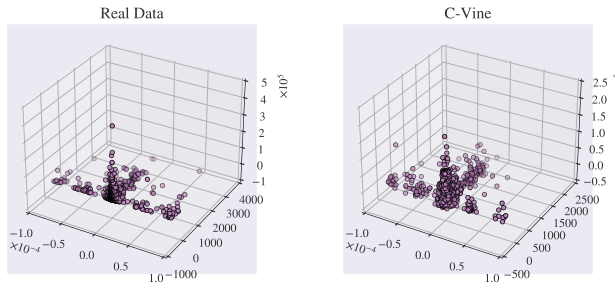

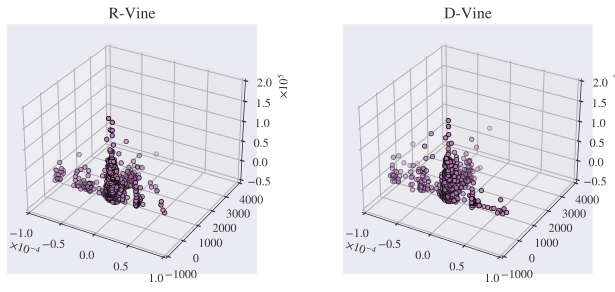

In [54]:
from copulas.visualization import side_by_side

side_by_side(scatter_3d, {'Real Data': data, 'C-Vine': center_samples})
side_by_side(scatter_3d, {'R-Vine': regular_samples, 'D-Vine': direct_samples})

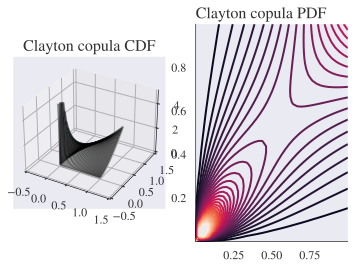

In [25]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d', title="Clayton copula CDF")
X, Y = np.meshgrid(u, v)

ax.set_zlim(0, 5)
ax.plot_surface(X, Y, c, cmap=cm.Blues)
ax.plot_wireframe(X, Y, c, color='black', alpha=0.3)

ax = fig.add_subplot(122, title="Clayton copula PDF")
ax.contour(X, Y, c, levels = np.arange(0,5,0.15))

plt.show()

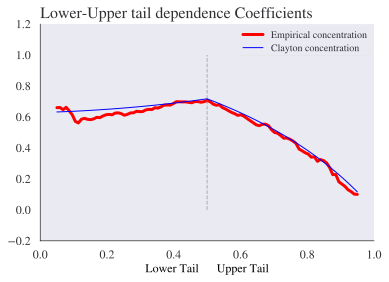

In [32]:
from pycopula.visualization import concentrationFunction
from pycopula.simulation import simulate

# The Clayton copula
clayton = ArchimedeanCopula(dim=2, family='clayton')

# Sampling of size 1000 with Clayton copula
sim = simulate(clayton, 1000)

# Computing theoritical and empirical concentrations functions
downI, upI, tailDown, tailUp = concentrationFunction(sim)
ClaytonDown = [ clayton.concentration_down(x) for x in downI ]
ClaytonUp = [ clayton.concentration_up(x) for x in upI ]

# Plotting
plt.figure()
plt.plot(downI, tailDown, color='red', linewidth=3, label="Empirical concentration")
plt.plot(upI, tailUp, color='red', linewidth=3)
plt.plot(downI, ClaytonDown, color='blue', linewidth=1, label="Clayton concentration")
plt.plot(upI, ClaytonUp, color='blue', linewidth=1)
plt.plot([0.5, 0.5], [0, 1], color='gray', alpha=0.6, linestyle='--', linewidth=1)
plt.title("Lower-Upper tail dependence Coefficients")
plt.xlabel("Lower Tail      Upper Tail")
plt.legend(loc=0)

plt.show()


In [19]:
microPriceChanges = [dataFrames[i].MicroPrice.pct_change().dropna() for i in range(0, len(dataFrames))]

In [ ]:
test= microPriceChanges[0].dropna()

In [ ]:
len(series_between_percentiles(test, 0.9, 0.1))

In [ ]:
# symbolIdx=0
# pklList = list(np.sort([s for s in OHLCDataList if (str(symbols[symbolIdx])) in s and ('ohlcFile') in s]))
# combinedDF = pd.DataFrame()
# for pklIdx, _ in enumerate(pklList):

#     pklOHLCFile = "".join((OHLCData,pklList[pklIdx]))
#     combinedDF = combinedDF.append(pickle.load(open(pklOHLCFile , "rb")))

In [ ]:
graphicsLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'


In [ ]:
# fileIdx=0
# FV1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and ('FV1') in s])
# combinedSymbolClockDF = pd.DataFrame()
# for pklIdx, _ in enumerate(pklList):

#     pklClockFile = "".join((ActivityCLockData,FV1ClocksData[pklIdx]))
#     combinedSymbolClockDF = combinedSymbolClockDF.append(pickle.load(open(pklClockFile , "rb")))

In [ ]:
symbol_choice='DU1'
DU1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and str(symbol_choice) in s])
pklidx=1
tickBarDictCondensedDU1 = dict()
for pklidx in range(0,39):
    pklClockFile = "".join((ActivityCLockData,DU1ClocksData[pklidx]))
    tickBarDF =pickle.load(open(pklClockFile , "rb"))['TickBarDf'] #tickbar
    tickBarDF['MicroPriceChange'] = tickBarDF.MicroPrice.pct_change()
    tickBarDictCondensedDU1[DU1ClocksData[pklidx].split('_')[3]]=tickBarDF 

## pick FB1 second ##

In [ ]:
symbol_choice_2='FB1'
FB1ClocksData = np.sort([s for s in os.listdir(ActivityCLockData) if 'Clocks' in s and (symbol_choice_2) in s])
pklidx=1
tickBarDictCondensedFB1 = dict()
for pklidx in range(0,25):
    pklClockFile = "".join((ActivityCLockData,FB1ClocksData[pklidx]))
    tickBarDF =pickle.load(open(pklClockFile , "rb"))['TickBarDf'] #tickbar
    tickBarDF['MicroPriceChange'] = tickBarDF.MicroPrice.pct_change()
    tickBarDictCondensedFB1[FB1ClocksData[pklidx].split('_')[3]]=tickBarDF [['BidSize', 'QuoteTime','BestBid',
       'TradeTime', 'AskSize','BestAsk', 'TradeVolume', 'TradedTime', 'type',
       'TradePrice', 'TimeStamp', 'milliSeconds','DollarVolume', 'MicroPrice', 'MicroPriceChange','TradeSize', 'DollarVolumeTraded']]


In [ ]:
keysDU1 = list(tickBarDictCondensedDU1.keys())                             
keysFB1 = list(tickBarDictCondensedFB1.keys())

## concatenate all the dictionaries into one 

In [ ]:

allDU1 =pd.concat(list(tickBarDictCondensedDU1.values() ), axis =0, keys = list(tickBarDictCondensedDU1.keys()))
allFB1 =pd.concat(list(tickBarDictCondensedFB1.values() ), axis =0, keys = list(tickBarDictCondensedFB1.keys()))


#### write a piece of code that essentially looks at returns across all the clocks and then assesses normality of returns. do we recover normality using different clocks?

### compute median prices properly

In [ ]:
medianMicroPrice_DU1_acrossDays = allDU1.median(level=0).MicroPrice.dropna()
medianMicroPrice_FB1_acrossDays = allFB1.median(level=0).MicroPrice.dropna()

In [ ]:
plt.plot(medianMicroPrice_DU1)
plt.show()
plt.plot(medianMicroPrice_FB1)


## remove extremities 

In [ ]:
DU1medianMPChange =series_between_percentiles(series= medianMicroPrice_DU1 , upperValue= 95, lowerValue=5)

In [ ]:
FB1medianMPChange =series_between_percentiles(series= medianMicroPrice_FB1 , upperValue= 95, lowerValue=5)

In [ ]:
fig, ax = plt.subplots(1, 1)
symbol_choice= 'DU1'
plt.hist(DU1medianMPChange, color='grey', density=True, histtype='stepfilled', alpha=0.3, bins=30)
plt.axvline(x=np.percentile(DU1medianMPChange, 50), c='red',linestyle = 'dotted')
legend = [symbol_choice+" 50% quantile"]
ax.legend(loc='best', frameon=False)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.title("Densities of microprice returns")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend(legend, loc='best')
title= 'DensityMicroPrice'+str(symbol_choice)+'.png'
# plt.savefig(os.path.join(graphicsLocation,title))